This is the third part of the project assigned to you. The objective is to use regression for imputation and data augmentation to improve model performance.

For each question, you need to provide a textual answer with the associated programming code with the analysis and justification of your answer. Please copy a version of this notebook to your Google Drive.

The datasets used in this practical can be located in:
[my_df2.pkl](https://drive.google.com/file/d/1T88MMRz9N06kQqqcIM1lSOUcMkJ6gsew/view?usp=share_link)

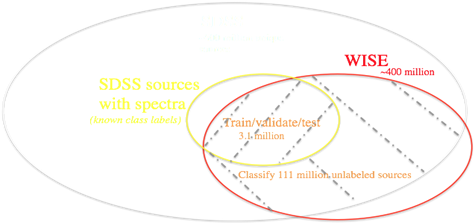

In [2]:
import pickle
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
#Loading/saving python data objects
# The "name" is rhe path to the datasets without extension
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

#1. Load the datset we provided and show the first 5 rows.

In [5]:
# load the data here
path_df = '/content/drive/My Drive/P3/my_df2'
df = load_obj(path_df)
df.shape
df.head()


,w1,w2,w3,w4,psf_u,psf_g,psf_r,psf_i,psf_z,w1^2,w1 w2,w1 w3,w1 w4,w1 psf_u,w1 psf_g,w1 psf_r,w1 psf_i,w1 psf_z,w2^2,w2 w3,w2 w4,w2 psf_u,w2 psf_g,w2 psf_r,w2 psf_i,w2 psf_z,w3^2,w3 w4,w3 psf_u,w3 psf_g,w3 psf_r,w3 psf_i,w3 psf_z,w4^2,w4 psf_u,w4 psf_g,w4 psf_r,w4 psf_i,w4 psf_z,psf_u^2,psf_u psf_g,psf_u psf_r,psf_u psf_i,psf_u psf_z,psf_g^2,psf_g psf_r,psf_g psf_i,psf_g psf_z,psf_r^2,psf_r psf_i,psf_r psf_z,psf_i^2,psf_i psf_z,psf_z^2,w1^3,w1^2 w2,w1^2 w3,w1^2 w4,w1^2 psf_u,w1^2 psf_g,w1^2 psf_r,w1^2 psf_i,w1^2 psf_z,w1 w2^2,w1 w2 w3,w1 w2 w4,w1 w2 psf_u,w1 w2 psf_g,w1 w2 psf_r,w1 w2 psf_i,w1 w2 psf_z,w1 w3^2,w1 w3 w4,w1 w3 psf_u,w1 w3 psf_g,w1 w3 psf_r,w1 w3 psf_i,w1 w3 psf_z,w1 w4^2,w1 w4 psf_u,w1 w4 psf_g,w1 w4 psf_r,w1 w4 psf_i,w1 w4 psf_z,w1 psf_u^2,w1 psf_u psf_g,w1 psf_u psf_r,w1 psf_u psf_i,w1 psf_u psf_z,w1 psf_g^2,w1 psf_g psf_r,w1 psf_g psf_i,w1 psf_g psf_z,w1 psf_r^2,w1 psf_r psf_i,w1 psf_r psf_z,w1 psf_i^2,w1 psf_i psf_z,w1 psf_z^2,w2^3,w2^2 w3,w2^2 w4,w2^2 psf_u,w2^2 psf_g,w2^2 psf_r,w2^2 psf_i,w2^2 psf_z,w2 w3^2,w2 w3 w4,w2 w3 psf_u,w2 w3 psf_g,w2 w3 psf_r,w2 w3 psf_i,w2 w3 psf_z,w2 w4^2,w2 w4 psf_u,w2 w4 psf_g,w2 w4 psf_r,w2 w4 psf_i,w2 w4 psf_z,w2 psf_u^2,w2 psf_u psf_g,w2 psf_u psf_r,w2 psf_u psf_i,w2 psf_u psf_z,w2 psf_g^2,w2 psf_g psf_r,w2 psf_g psf_i,w2 psf_g psf_z,w2 psf_r^2,w2 psf_r psf_i,w2 psf_r psf_z,w2 psf_i^2,w2 psf_i psf_z,w2 psf_z^2,w3^3,w3^2 w4,w3^2 psf_u,w3^2 psf_g,w3^2 psf_r,w3^2 psf_i,w3^2 psf_z,w3 w4^2,w3 w4 psf_u,w3 w4 psf_g,w3 w4 psf_r,w3 w4 psf_i,w3 w4 psf_z,w3 psf_u^2,w3 psf_u psf_g,w3 psf_u psf_r,w3 psf_u psf_i,w3 psf_u psf_z,w3 psf_g^2,w3 psf_g psf_r,w3 psf_g psf_i,w3 psf_g psf_z,w3 psf_r^2,w3 psf_r psf_i,w3 psf_r psf_z,w3 psf_i^2,w3 psf_i psf_z,w3 psf_z^2,w4^3,w4^2 psf_u,w4^2 psf_g,w4^2 psf_r,w4^2 psf_i,w4^2 psf_z,w4 psf_u^2,w4 psf_u psf_g,w4 psf_u psf_r,w4 psf_u psf_i,w4 psf_u psf_z,w4 psf_g^2,w4 psf_g psf_r,w4 psf_g psf_i,w4 psf_g psf_z,w4 psf_r^2,w4 psf_r psf_i,w4 psf_r psf_z,w4 psf_i^2,w4 psf_i psf_z,w4 psf_z^2,psf_u^3,psf_u^2 psf_g,psf_u^2 psf_r,psf_u^2 psf_i,psf_u^2 psf_z,psf_u psf_g^2,psf_u psf_g psf_r,psf_u psf_g psf_i,psf_u psf_g psf_z,psf_u psf_r^2,psf_u psf_r psf_i,psf_u psf_r psf_z,psf_u psf_i^2,psf_u psf_i psf_z,psf_u psf_z^2,psf_g^3,psf_g^2 psf_r,psf_g^2 psf_i,psf_g^2 psf_z,psf_g psf_r^2,psf_g psf_r psf_i,psf_g psf_r psf_z,psf_g psf_i^2,psf_g psf_i psf_z,psf_g psf_z^2,psf_r^3,psf_r^2 psf_i,psf_r^2 psf_z,psf_r psf_i^2,psf_r psf_i psf_z,psf_r psf_z^2,psf_i^3,psf_i^2 psf_z,psf_i psf_z^2,psf_z^3,resolvedr,class
0,0.508424,0.537312,0.650736,0.781926,0.492435,0.526574,0.531409,0.545247,0.432611,0.386250,0.415779,0.468774,0.555416,0.469447,0.436832,0.444806,0.449428,0.435999,0.421081,0.477522,0.567235,0.470317,0.443206,0.461796,0.484493,0.462596,0.529538,0.599597,0.459732,0.486989,0.485889,0.498313,0.494152,0.662623,0.603799,0.584802,0.570072,0.567702,0.586337,0.373596,0.447575,0.460845,0.496909,0.474914,0.408984,0.413447,0.439347,0.439151,0.409730,0.425756,0.438865,0.424327,0.437421,0.306380,0.281482,0.309457,0.335230,0.386462,0.356782,0.336572,0.325882,0.322520,0.317959,0.314715,0.352722,0.397870,0.369320,0.350511,0.359792,0.364733,0.354141,0.402901,0.456118,0.413420,0.380150,0.385605,0.385226,0.379466,0.501442,0.464998,0.437030,0.441547,0.439877,0.435246,0.348495,0.366982,0.367022,0.397822,0.378530,0.329332,0.335936,0.360074,0.357686,0.339052,0.364899,0.368477,0.350718,0.356740,0.301900,0.318117,0.351050,0.403587,0.370388,0.352691,0.367260,0.373921,0.361489,0.397279,0.447439,0.414652,0.393787,0.389010,0.405468,0.394024,0.494976,0.473754,0.439273,0.439829,0.468915,0.453900,0.352327,0.384779,0.386508,0.418460,0.399385,0.330151,0.354264,0.379806,0.362924,0.346266,0.373270,0.369328,0.366703,0.377051,0.315244,0.417462,0.461416,0.433101,0.417810,0.422014,0.439488,0.436229,0.504912,0.489033,0.477435,0.484659,0.509372,0.494366,0.329749,0.397459,0.409107,0.437739,0.429934,0.365121,0.379516,0.386754,0.406271,0.361436,0.383475,0.386537,0.381413,0.392167,0.368529,0.549816,0.539280,0.5267

#2. Identify a column that contains missing values.

In [6]:
# Your code here
#df.isna().sum()
missing_columns = df.columns[df.isna().any()].tolist()
print("Columns with missing values:", missing_columns)
df.isna().sum()

Columns with missing values: ['resolvedr']


w1                   0
w2                   0
w3                   0
w4                   0
psf_u                0
                 ...  
psf_i^2 psf_z        0
psf_i psf_z^2        0
psf_z^3              0
resolvedr        10493
class                0
Length: 221, dtype: int64

# 3. Use a regression model for data imputation.
Previously, we have removed rows with missing values or imputed values using mean, median, or the most frequent value of a particular column. For this, please build a regression model with the column identified on item 2 as target and the other column as features. Use the predictions of the model to imput the missing values.

In [7]:
# Tip: you can use Linear regression from sci-kit learn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
# or another regressor.

# Your code here  # This line creates a new DataFrame called test_data by selecting rows from the original DataFrame (df)
#where the columns specified in missing_columns have missing (null) values

test_data = df[df['resolvedr'].isnull()]
test_data


,w1,w2,w3,w4,psf_u,psf_g,psf_r,psf_i,psf_z,w1^2,w1 w2,w1 w3,w1 w4,w1 psf_u,w1 psf_g,w1 psf_r,w1 psf_i,w1 psf_z,w2^2,w2 w3,w2 w4,w2 psf_u,w2 psf_g,w2 psf_r,w2 psf_i,w2 psf_z,w3^2,w3 w4,w3 psf_u,w3 psf_g,w3 psf_r,w3 psf_i,w3 psf_z,w4^2,w4 psf_u,w4 psf_g,w4 psf_r,w4 psf_i,w4 psf_z,psf_u^2,psf_u psf_g,psf_u psf_r,psf_u psf_i,psf_u psf_z,psf_g^2,psf_g psf_r,psf_g psf_i,psf_g psf_z,psf_r^2,psf_r psf_i,psf_r psf_z,psf_i^2,psf_i psf_z,psf_z^2,w1^3,w1^2 w2,w1^2 w3,w1^2 w4,w1^2 psf_u,w1^2 psf_g,w1^2 psf_r,w1^2 psf_i,w1^2 psf_z,w1 w2^2,w1 w2 w3,w1 w2 w4,w1 w2 psf_u,w1 w2 psf_g,w1 w2 psf_r,w1 w2 psf_i,w1 w2 psf_z,w1 w3^2,w1 w3 w4,w1 w3 psf_u,w1 w3 psf_g,w1 w3 psf_r,w1 w3 psf_i,w1 w3 psf_z,w1 w4^2,w1 w4 psf_u,w1 w4 psf_g,w1 w4 psf_r,w1 w4 psf_i,w1 w4 psf_z,w1 psf_u^2,w1 psf_u psf_g,w1 psf_u psf_r,w1 psf_u psf_i,w1 psf_u psf_z,w1 psf_g^2,w1 psf_g psf_r,w1 psf_g psf_i,w1 psf_g psf_z,w1 psf_r^2,w1 psf_r psf_i,w1 psf_r psf_z,w1 psf_i^2,w1 psf_i psf_z,w1 psf_z^2,w2^3,w2^2 w3,w2^2 w4,w2^2 psf_u,w2^2 psf_g,w2^2 psf_r,w2^2 psf_i,w2^2 psf_z,w2 w3^2,w2 w3 w4,w2 w3 psf_u,w2 w3 psf_g,w2 w3 psf_r,w2 w3 psf_i,w2 w3 psf_z,w2 w4^2,w2 w4 psf_u,w2 w4 psf_g,w2 w4 psf_r,w2 w4 psf_i,w2 w4 psf_z,w2 psf_u^2,w2 psf_u psf_g,w2 psf_u psf_r,w2 psf_u psf_i,w2 psf_u psf_z,w2 psf_g^2,w2 psf_g psf_r,w2 psf_g psf_i,w2 psf_g psf_z,w2 psf_r^2,w2 psf_r psf_i,w2 psf_r psf_z,w2 psf_i^2,w2 psf_i psf_z,w2 psf_z^2,w3^3,w3^2 w4,w3^2 psf_u,w3^2 psf_g,w3^2 psf_r,w3^2 psf_i,w3^2 psf_z,w3 w4^2,w3 w4 psf_u,w3 w4 psf_g,w3 w4 psf_r,w3 w4 psf_i,w3 w4 psf_z,w3 psf_u^2,w3 psf_u psf_g,w3 psf_u psf_r,w3 psf_u psf_i,w3 psf_u psf_z,w3 psf_g^2,w3 psf_g psf_r,w3 psf_g psf_i,w3 psf_g psf_z,w3 psf_r^2,w3 psf_r psf_i,w3 psf_r psf_z,w3 psf_i^2,w3 psf_i psf_z,w3 psf_z^2,w4^3,w4^2 psf_u,w4^2 psf_g,w4^2 psf_r,w4^2 psf_i,w4^2 psf_z,w4 psf_u^2,w4 psf_u psf_g,w4 psf_u psf_r,w4 psf_u psf_i,w4 psf_u psf_z,w4 psf_g^2,w4 psf_g psf_r,w4 psf_g psf_i,w4 psf_g psf_z,w4 psf_r^2,w4 psf_r psf_i,w4 psf_r psf_z,w4 psf_i^2,w4 psf_i psf_z,w4 psf_z^2,psf_u^3,psf_u^2 psf_g,psf_u^2 psf_r,psf_u^2 psf_i,psf_u^2 psf_z,psf_u psf_g^2,psf_u psf_g psf_r,psf_u psf_g psf_i,psf_u psf_g psf_z,psf_u psf_r^2,psf_u psf_r psf_i,psf_u psf_r psf_z,psf_u psf_i^2,psf_u psf_i psf_z,psf_u psf_z^2,psf_g^3,psf_g^2 psf_r,psf_g^2 psf_i,psf_g^2 psf_z,psf_g psf_r^2,psf_g psf_r psf_i,psf_g psf_r psf_z,psf_g psf_i^2,psf_g psf_i psf_z,psf_g psf_z^2,psf_r^3,psf_r^2 psf_i,psf_r^2 psf_z,psf_r psf_i^2,psf_r psf_i psf_z,psf_r psf_z^2,psf_i^3,psf_i^2 psf_z,psf_i psf_z^2,psf_z^3,resolvedr,class
19,0.730358,0.769438,0.810239,0.849960,0.637310,0.765080,0.766341,0.745752,0.616352,0.634089,0.680203,0.722581,0.749458,0.723342,0.721829,0.733573,0.714340,0.709885,0.686497,0.729353,0.760614,0.722082,0.729863,0.758947,0.767275,0.750589,0.728250,0.747183,0.673726,0.767661,0.763907,0.753410,0.767013,0.760734,0.765111,0.803417,0.785422,0.755124,0.791600,0.527408,0.694397,0.710551,0.739465,0.725526,0.680302,0.686275,0.702744,0.719776,0.678843,0.679994,0.717825,0.653287,0.689313,0.494748,0.538638,0.589918,0.609933,0.634378,0.641950,0.647283,0.626815,0.600542,0.603139,0.597665,0.639355,0.649206,0.661981,0.671541,0.689401,0.676517,0.669225,0.673385,0.692842,0.707064,0.695303,0.705138,0.681451,0.684462,0.701715,0.720353,0.729733,0.739237,0.712733,0.715041,0.589188,0.663708,0.663776,0.696120,0.675127,0.636552,0.649369,0.673772,0.681923,0.655516,0.683019,0.702558,0.635564,0.658387,0.567695,0.601837,0.633945,0.654638,0.661372,0.673167,0.701032,0.690879,0.680526,0.659893,0.676080,0.706499,0.717566,0.708694,0.714514,0.708064,0.689302,0.729265,0.728709,0.731575,0.754916,0.740904,0.593381,0.693263,0.696352,0.729389,0.709616,0.635735,0.682201,0.707959,0.689301,0.666905,0.695982,0.701503,0.661919,0.693186,0.590546,0.643939,0.654709,0.684076,0.711761,0.720825,0.726243,0.730909,0.663608,0.698032,0.732644,0.745734,0.759573,0.747319,0.529567,0.683464,0.703245,0.727379,0.728907,0.671356,0.697630,0.687686,0.736703,0.664295,0.681868,0.700731,0.656125,0.687631,0.659005,0.671499,0.707701,0.741

In [8]:
df.dropna(inplace = True)

In [9]:
df.shape

(94443, 221)

In [10]:
#create x_train and y_train

y_train = df[missing_columns]

In [11]:
y_train

,resolvedr
0,0.323787
1,0.283710
2,0.141468
3,0.000559
4,0.333945
...,...
104929,0.251458
104931,0.255187
104933,0.000374
104934,0.270572


In [12]:
x_train = df.drop(missing_columns, axis = 1)

In [13]:
x_train

,w1,w2,w3,w4,psf_u,psf_g,psf_r,psf_i,psf_z,w1^2,w1 w2,w1 w3,w1 w4,w1 psf_u,w1 psf_g,w1 psf_r,w1 psf_i,w1 psf_z,w2^2,w2 w3,w2 w4,w2 psf_u,w2 psf_g,w2 psf_r,w2 psf_i,w2 psf_z,w3^2,w3 w4,w3 psf_u,w3 psf_g,w3 psf_r,w3 psf_i,w3 psf_z,w4^2,w4 psf_u,w4 psf_g,w4 psf_r,w4 psf_i,w4 psf_z,psf_u^2,psf_u psf_g,psf_u psf_r,psf_u psf_i,psf_u psf_z,psf_g^2,psf_g psf_r,psf_g psf_i,psf_g psf_z,psf_r^2,psf_r psf_i,psf_r psf_z,psf_i^2,psf_i psf_z,psf_z^2,w1^3,w1^2 w2,w1^2 w3,w1^2 w4,w1^2 psf_u,w1^2 psf_g,w1^2 psf_r,w1^2 psf_i,w1^2 psf_z,w1 w2^2,w1 w2 w3,w1 w2 w4,w1 w2 psf_u,w1 w2 psf_g,w1 w2 psf_r,w1 w2 psf_i,w1 w2 psf_z,w1 w3^2,w1 w3 w4,w1 w3 psf_u,w1 w3 psf_g,w1 w3 psf_r,w1 w3 psf_i,w1 w3 psf_z,w1 w4^2,w1 w4 psf_u,w1 w4 psf_g,w1 w4 psf_r,w1 w4 psf_i,w1 w4 psf_z,w1 psf_u^2,w1 psf_u psf_g,w1 psf_u psf_r,w1 psf_u psf_i,w1 psf_u psf_z,w1 psf_g^2,w1 psf_g psf_r,w1 psf_g psf_i,w1 psf_g psf_z,w1 psf_r^2,w1 psf_r psf_i,w1 psf_r psf_z,w1 psf_i^2,w1 psf_i psf_z,w1 psf_z^2,w2^3,w2^2 w3,w2^2 w4,w2^2 psf_u,w2^2 psf_g,w2^2 psf_r,w2^2 psf_i,w2^2 psf_z,w2 w3^2,w2 w3 w4,w2 w3 psf_u,w2 w3 psf_g,w2 w3 psf_r,w2 w3 psf_i,w2 w3 psf_z,w2 w4^2,w2 w4 psf_u,w2 w4 psf_g,w2 w4 psf_r,w2 w4 psf_i,w2 w4 psf_z,w2 psf_u^2,w2 psf_u psf_g,w2 psf_u psf_r,w2 psf_u psf_i,w2 psf_u psf_z,w2 psf_g^2,w2 psf_g psf_r,w2 psf_g psf_i,w2 psf_g psf_z,w2 psf_r^2,w2 psf_r psf_i,w2 psf_r psf_z,w2 psf_i^2,w2 psf_i psf_z,w2 psf_z^2,w3^3,w3^2 w4,w3^2 psf_u,w3^2 psf_g,w3^2 psf_r,w3^2 psf_i,w3^2 psf_z,w3 w4^2,w3 w4 psf_u,w3 w4 psf_g,w3 w4 psf_r,w3 w4 psf_i,w3 w4 psf_z,w3 psf_u^2,w3 psf_u psf_g,w3 psf_u psf_r,w3 psf_u psf_i,w3 psf_u psf_z,w3 psf_g^2,w3 psf_g psf_r,w3 psf_g psf_i,w3 psf_g psf_z,w3 psf_r^2,w3 psf_r psf_i,w3 psf_r psf_z,w3 psf_i^2,w3 psf_i psf_z,w3 psf_z^2,w4^3,w4^2 psf_u,w4^2 psf_g,w4^2 psf_r,w4^2 psf_i,w4^2 psf_z,w4 psf_u^2,w4 psf_u psf_g,w4 psf_u psf_r,w4 psf_u psf_i,w4 psf_u psf_z,w4 psf_g^2,w4 psf_g psf_r,w4 psf_g psf_i,w4 psf_g psf_z,w4 psf_r^2,w4 psf_r psf_i,w4 psf_r psf_z,w4 psf_i^2,w4 psf_i psf_z,w4 psf_z^2,psf_u^3,psf_u^2 psf_g,psf_u^2 psf_r,psf_u^2 psf_i,psf_u^2 psf_z,psf_u psf_g^2,psf_u psf_g psf_r,psf_u psf_g psf_i,psf_u psf_g psf_z,psf_u psf_r^2,psf_u psf_r psf_i,psf_u psf_r psf_z,psf_u psf_i^2,psf_u psf_i psf_z,psf_u psf_z^2,psf_g^3,psf_g^2 psf_r,psf_g^2 psf_i,psf_g^2 psf_z,psf_g psf_r^2,psf_g psf_r psf_i,psf_g psf_r psf_z,psf_g psf_i^2,psf_g psf_i psf_z,psf_g psf_z^2,psf_r^3,psf_r^2 psf_i,psf_r^2 psf_z,psf_r psf_i^2,psf_r psf_i psf_z,psf_r psf_z^2,psf_i^3,psf_i^2 psf_z,psf_i psf_z^2,psf_z^3,class
0,0.508424,0.537312,0.650736,0.781926,0.492435,0.526574,0.531409,0.545247,0.432611,0.386250,0.415779,0.468774,0.555416,0.469447,0.436832,0.444806,0.449428,0.435999,0.421081,0.477522,0.567235,0.470317,0.443206,0.461796,0.484493,0.462596,0.529538,0.599597,0.459732,0.486989,0.485889,0.498313,0.494152,0.662623,0.603799,0.584802,0.570072,0.567702,0.586337,0.373596,0.447575,0.460845,0.496909,0.474914,0.408984,0.413447,0.439347,0.439151,0.409730,0.425756,0.438865,0.424327,0.437421,0.306380,0.281482,0.309457,0.335230,0.386462,0.356782,0.336572,0.325882,0.322520,0.317959,0.314715,0.352722,0.397870,0.369320,0.350511,0.359792,0.364733,0.354141,0.402901,0.456118,0.413420,0.380150,0.385605,0.385226,0.379466,0.501442,0.464998,0.437030,0.441547,0.439877,0.435246,0.348495,0.366982,0.367022,0.397822,0.378530,0.329332,0.335936,0.360074,0.357686,0.339052,0.364899,0.368477,0.350718,0.356740,0.301900,0.318117,0.351050,0.403587,0.370388,0.352691,0.367260,0.373921,0.361489,0.397279,0.447439,0.414652,0.393787,0.389010,0.405468,0.394024,0.494976,0.473754,0.439273,0.439829,0.468915,0.453900,0.352327,0.384779,0.386508,0.418460,0.399385,0.330151,0.354264,0.379806,0.362924,0.346266,0.373270,0.369328,0.366703,0.377051,0.315244,0.417462,0.461416,0.433101,0.417810,0.422014,0.439488,0.436229,0.504912,0.489033,0.477435,0.484659,0.509372,0.494366,0.329749,0.397459,0.409107,0.437739,0.429934,0.365121,0.379516,0.386754,0.406271,0.361436,0.383475,0.386537,0.381413,0.392167,0.368529,0.549816,0.539280,0.526731,0.53451

In [14]:
#build a model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
#create the x_test from the test_data

X_test = test_data.drop(missing_columns, axis = 1)

In [16]:
X_test

,w1,w2,w3,w4,psf_u,psf_g,psf_r,psf_i,psf_z,w1^2,w1 w2,w1 w3,w1 w4,w1 psf_u,w1 psf_g,w1 psf_r,w1 psf_i,w1 psf_z,w2^2,w2 w3,w2 w4,w2 psf_u,w2 psf_g,w2 psf_r,w2 psf_i,w2 psf_z,w3^2,w3 w4,w3 psf_u,w3 psf_g,w3 psf_r,w3 psf_i,w3 psf_z,w4^2,w4 psf_u,w4 psf_g,w4 psf_r,w4 psf_i,w4 psf_z,psf_u^2,psf_u psf_g,psf_u psf_r,psf_u psf_i,psf_u psf_z,psf_g^2,psf_g psf_r,psf_g psf_i,psf_g psf_z,psf_r^2,psf_r psf_i,psf_r psf_z,psf_i^2,psf_i psf_z,psf_z^2,w1^3,w1^2 w2,w1^2 w3,w1^2 w4,w1^2 psf_u,w1^2 psf_g,w1^2 psf_r,w1^2 psf_i,w1^2 psf_z,w1 w2^2,w1 w2 w3,w1 w2 w4,w1 w2 psf_u,w1 w2 psf_g,w1 w2 psf_r,w1 w2 psf_i,w1 w2 psf_z,w1 w3^2,w1 w3 w4,w1 w3 psf_u,w1 w3 psf_g,w1 w3 psf_r,w1 w3 psf_i,w1 w3 psf_z,w1 w4^2,w1 w4 psf_u,w1 w4 psf_g,w1 w4 psf_r,w1 w4 psf_i,w1 w4 psf_z,w1 psf_u^2,w1 psf_u psf_g,w1 psf_u psf_r,w1 psf_u psf_i,w1 psf_u psf_z,w1 psf_g^2,w1 psf_g psf_r,w1 psf_g psf_i,w1 psf_g psf_z,w1 psf_r^2,w1 psf_r psf_i,w1 psf_r psf_z,w1 psf_i^2,w1 psf_i psf_z,w1 psf_z^2,w2^3,w2^2 w3,w2^2 w4,w2^2 psf_u,w2^2 psf_g,w2^2 psf_r,w2^2 psf_i,w2^2 psf_z,w2 w3^2,w2 w3 w4,w2 w3 psf_u,w2 w3 psf_g,w2 w3 psf_r,w2 w3 psf_i,w2 w3 psf_z,w2 w4^2,w2 w4 psf_u,w2 w4 psf_g,w2 w4 psf_r,w2 w4 psf_i,w2 w4 psf_z,w2 psf_u^2,w2 psf_u psf_g,w2 psf_u psf_r,w2 psf_u psf_i,w2 psf_u psf_z,w2 psf_g^2,w2 psf_g psf_r,w2 psf_g psf_i,w2 psf_g psf_z,w2 psf_r^2,w2 psf_r psf_i,w2 psf_r psf_z,w2 psf_i^2,w2 psf_i psf_z,w2 psf_z^2,w3^3,w3^2 w4,w3^2 psf_u,w3^2 psf_g,w3^2 psf_r,w3^2 psf_i,w3^2 psf_z,w3 w4^2,w3 w4 psf_u,w3 w4 psf_g,w3 w4 psf_r,w3 w4 psf_i,w3 w4 psf_z,w3 psf_u^2,w3 psf_u psf_g,w3 psf_u psf_r,w3 psf_u psf_i,w3 psf_u psf_z,w3 psf_g^2,w3 psf_g psf_r,w3 psf_g psf_i,w3 psf_g psf_z,w3 psf_r^2,w3 psf_r psf_i,w3 psf_r psf_z,w3 psf_i^2,w3 psf_i psf_z,w3 psf_z^2,w4^3,w4^2 psf_u,w4^2 psf_g,w4^2 psf_r,w4^2 psf_i,w4^2 psf_z,w4 psf_u^2,w4 psf_u psf_g,w4 psf_u psf_r,w4 psf_u psf_i,w4 psf_u psf_z,w4 psf_g^2,w4 psf_g psf_r,w4 psf_g psf_i,w4 psf_g psf_z,w4 psf_r^2,w4 psf_r psf_i,w4 psf_r psf_z,w4 psf_i^2,w4 psf_i psf_z,w4 psf_z^2,psf_u^3,psf_u^2 psf_g,psf_u^2 psf_r,psf_u^2 psf_i,psf_u^2 psf_z,psf_u psf_g^2,psf_u psf_g psf_r,psf_u psf_g psf_i,psf_u psf_g psf_z,psf_u psf_r^2,psf_u psf_r psf_i,psf_u psf_r psf_z,psf_u psf_i^2,psf_u psf_i psf_z,psf_u psf_z^2,psf_g^3,psf_g^2 psf_r,psf_g^2 psf_i,psf_g^2 psf_z,psf_g psf_r^2,psf_g psf_r psf_i,psf_g psf_r psf_z,psf_g psf_i^2,psf_g psf_i psf_z,psf_g psf_z^2,psf_r^3,psf_r^2 psf_i,psf_r^2 psf_z,psf_r psf_i^2,psf_r psf_i psf_z,psf_r psf_z^2,psf_i^3,psf_i^2 psf_z,psf_i psf_z^2,psf_z^3,class
19,0.730358,0.769438,0.810239,0.849960,0.637310,0.765080,0.766341,0.745752,0.616352,0.634089,0.680203,0.722581,0.749458,0.723342,0.721829,0.733573,0.714340,0.709885,0.686497,0.729353,0.760614,0.722082,0.729863,0.758947,0.767275,0.750589,0.728250,0.747183,0.673726,0.767661,0.763907,0.753410,0.767013,0.760734,0.765111,0.803417,0.785422,0.755124,0.791600,0.527408,0.694397,0.710551,0.739465,0.725526,0.680302,0.686275,0.702744,0.719776,0.678843,0.679994,0.717825,0.653287,0.689313,0.494748,0.538638,0.589918,0.609933,0.634378,0.641950,0.647283,0.626815,0.600542,0.603139,0.597665,0.639355,0.649206,0.661981,0.671541,0.689401,0.676517,0.669225,0.673385,0.692842,0.707064,0.695303,0.705138,0.681451,0.684462,0.701715,0.720353,0.729733,0.739237,0.712733,0.715041,0.589188,0.663708,0.663776,0.696120,0.675127,0.636552,0.649369,0.673772,0.681923,0.655516,0.683019,0.702558,0.635564,0.658387,0.567695,0.601837,0.633945,0.654638,0.661372,0.673167,0.701032,0.690879,0.680526,0.659893,0.676080,0.706499,0.717566,0.708694,0.714514,0.708064,0.689302,0.729265,0.728709,0.731575,0.754916,0.740904,0.593381,0.693263,0.696352,0.729389,0.709616,0.635735,0.682201,0.707959,0.689301,0.666905,0.695982,0.701503,0.661919,0.693186,0.590546,0.643939,0.654709,0.684076,0.711761,0.720825,0.726243,0.730909,0.663608,0.698032,0.732644,0.745734,0.759573,0.747319,0.529567,0.683464,0.703245,0.727379,0.728907,0.671356,0.697630,0.687686,0.736703,0.664295,0.681868,0.700731,0.656125,0.687631,0.659005,0.671499,0.707701,0.741855,0.7548

In [17]:
#apply the model on X_test and predict the missing values
y_pred = lr.predict(X_test)
y_pred

array([[ 0.17700373],
       [ 0.1100126 ],
       [ 0.13554062],
       ...,
       [ 0.25461687],
       [ 0.14140108],
       [-0.00870333]])

In [18]:
#replace the missing values with predcited values
test_data.loc[test_data.resolvedr.isnull(), 'resolvedr'] = y_pred
test_data

,w1,w2,w3,w4,psf_u,psf_g,psf_r,psf_i,psf_z,w1^2,w1 w2,w1 w3,w1 w4,w1 psf_u,w1 psf_g,w1 psf_r,w1 psf_i,w1 psf_z,w2^2,w2 w3,w2 w4,w2 psf_u,w2 psf_g,w2 psf_r,w2 psf_i,w2 psf_z,w3^2,w3 w4,w3 psf_u,w3 psf_g,w3 psf_r,w3 psf_i,w3 psf_z,w4^2,w4 psf_u,w4 psf_g,w4 psf_r,w4 psf_i,w4 psf_z,psf_u^2,psf_u psf_g,psf_u psf_r,psf_u psf_i,psf_u psf_z,psf_g^2,psf_g psf_r,psf_g psf_i,psf_g psf_z,psf_r^2,psf_r psf_i,psf_r psf_z,psf_i^2,psf_i psf_z,psf_z^2,w1^3,w1^2 w2,w1^2 w3,w1^2 w4,w1^2 psf_u,w1^2 psf_g,w1^2 psf_r,w1^2 psf_i,w1^2 psf_z,w1 w2^2,w1 w2 w3,w1 w2 w4,w1 w2 psf_u,w1 w2 psf_g,w1 w2 psf_r,w1 w2 psf_i,w1 w2 psf_z,w1 w3^2,w1 w3 w4,w1 w3 psf_u,w1 w3 psf_g,w1 w3 psf_r,w1 w3 psf_i,w1 w3 psf_z,w1 w4^2,w1 w4 psf_u,w1 w4 psf_g,w1 w4 psf_r,w1 w4 psf_i,w1 w4 psf_z,w1 psf_u^2,w1 psf_u psf_g,w1 psf_u psf_r,w1 psf_u psf_i,w1 psf_u psf_z,w1 psf_g^2,w1 psf_g psf_r,w1 psf_g psf_i,w1 psf_g psf_z,w1 psf_r^2,w1 psf_r psf_i,w1 psf_r psf_z,w1 psf_i^2,w1 psf_i psf_z,w1 psf_z^2,w2^3,w2^2 w3,w2^2 w4,w2^2 psf_u,w2^2 psf_g,w2^2 psf_r,w2^2 psf_i,w2^2 psf_z,w2 w3^2,w2 w3 w4,w2 w3 psf_u,w2 w3 psf_g,w2 w3 psf_r,w2 w3 psf_i,w2 w3 psf_z,w2 w4^2,w2 w4 psf_u,w2 w4 psf_g,w2 w4 psf_r,w2 w4 psf_i,w2 w4 psf_z,w2 psf_u^2,w2 psf_u psf_g,w2 psf_u psf_r,w2 psf_u psf_i,w2 psf_u psf_z,w2 psf_g^2,w2 psf_g psf_r,w2 psf_g psf_i,w2 psf_g psf_z,w2 psf_r^2,w2 psf_r psf_i,w2 psf_r psf_z,w2 psf_i^2,w2 psf_i psf_z,w2 psf_z^2,w3^3,w3^2 w4,w3^2 psf_u,w3^2 psf_g,w3^2 psf_r,w3^2 psf_i,w3^2 psf_z,w3 w4^2,w3 w4 psf_u,w3 w4 psf_g,w3 w4 psf_r,w3 w4 psf_i,w3 w4 psf_z,w3 psf_u^2,w3 psf_u psf_g,w3 psf_u psf_r,w3 psf_u psf_i,w3 psf_u psf_z,w3 psf_g^2,w3 psf_g psf_r,w3 psf_g psf_i,w3 psf_g psf_z,w3 psf_r^2,w3 psf_r psf_i,w3 psf_r psf_z,w3 psf_i^2,w3 psf_i psf_z,w3 psf_z^2,w4^3,w4^2 psf_u,w4^2 psf_g,w4^2 psf_r,w4^2 psf_i,w4^2 psf_z,w4 psf_u^2,w4 psf_u psf_g,w4 psf_u psf_r,w4 psf_u psf_i,w4 psf_u psf_z,w4 psf_g^2,w4 psf_g psf_r,w4 psf_g psf_i,w4 psf_g psf_z,w4 psf_r^2,w4 psf_r psf_i,w4 psf_r psf_z,w4 psf_i^2,w4 psf_i psf_z,w4 psf_z^2,psf_u^3,psf_u^2 psf_g,psf_u^2 psf_r,psf_u^2 psf_i,psf_u^2 psf_z,psf_u psf_g^2,psf_u psf_g psf_r,psf_u psf_g psf_i,psf_u psf_g psf_z,psf_u psf_r^2,psf_u psf_r psf_i,psf_u psf_r psf_z,psf_u psf_i^2,psf_u psf_i psf_z,psf_u psf_z^2,psf_g^3,psf_g^2 psf_r,psf_g^2 psf_i,psf_g^2 psf_z,psf_g psf_r^2,psf_g psf_r psf_i,psf_g psf_r psf_z,psf_g psf_i^2,psf_g psf_i psf_z,psf_g psf_z^2,psf_r^3,psf_r^2 psf_i,psf_r^2 psf_z,psf_r psf_i^2,psf_r psf_i psf_z,psf_r psf_z^2,psf_i^3,psf_i^2 psf_z,psf_i psf_z^2,psf_z^3,resolvedr,class
19,0.730358,0.769438,0.810239,0.849960,0.637310,0.765080,0.766341,0.745752,0.616352,0.634089,0.680203,0.722581,0.749458,0.723342,0.721829,0.733573,0.714340,0.709885,0.686497,0.729353,0.760614,0.722082,0.729863,0.758947,0.767275,0.750589,0.728250,0.747183,0.673726,0.767661,0.763907,0.753410,0.767013,0.760734,0.765111,0.803417,0.785422,0.755124,0.791600,0.527408,0.694397,0.710551,0.739465,0.725526,0.680302,0.686275,0.702744,0.719776,0.678843,0.679994,0.717825,0.653287,0.689313,0.494748,0.538638,0.589918,0.609933,0.634378,0.641950,0.647283,0.626815,0.600542,0.603139,0.597665,0.639355,0.649206,0.661981,0.671541,0.689401,0.676517,0.669225,0.673385,0.692842,0.707064,0.695303,0.705138,0.681451,0.684462,0.701715,0.720353,0.729733,0.739237,0.712733,0.715041,0.589188,0.663708,0.663776,0.696120,0.675127,0.636552,0.649369,0.673772,0.681923,0.655516,0.683019,0.702558,0.635564,0.658387,0.567695,0.601837,0.633945,0.654638,0.661372,0.673167,0.701032,0.690879,0.680526,0.659893,0.676080,0.706499,0.717566,0.708694,0.714514,0.708064,0.689302,0.729265,0.728709,0.731575,0.754916,0.740904,0.593381,0.693263,0.696352,0.729389,0.709616,0.635735,0.682201,0.707959,0.689301,0.666905,0.695982,0.701503,0.661919,0.693186,0.590546,0.643939,0.654709,0.684076,0.711761,0.720825,0.726243,0.730909,0.663608,0.698032,0.732644,0.745734,0.759573,0.747319,0.529567,0.683464,0.703245,0.727379,0.728907,0.671356,0.697630,0.687686,0.736703,0.664295,0.681868,0.700731,0.656125,0.687631,0.659005,0.671499,0.707701,0.741

In [19]:
df_imputed = pd.concat([test_data, df])
print(df_imputed.shape)
df_imputed.head()

(104936, 221)


,w1,w2,w3,w4,psf_u,psf_g,psf_r,psf_i,psf_z,w1^2,w1 w2,w1 w3,w1 w4,w1 psf_u,w1 psf_g,w1 psf_r,w1 psf_i,w1 psf_z,w2^2,w2 w3,w2 w4,w2 psf_u,w2 psf_g,w2 psf_r,w2 psf_i,w2 psf_z,w3^2,w3 w4,w3 psf_u,w3 psf_g,w3 psf_r,w3 psf_i,w3 psf_z,w4^2,w4 psf_u,w4 psf_g,w4 psf_r,w4 psf_i,w4 psf_z,psf_u^2,psf_u psf_g,psf_u psf_r,psf_u psf_i,psf_u psf_z,psf_g^2,psf_g psf_r,psf_g psf_i,psf_g psf_z,psf_r^2,psf_r psf_i,psf_r psf_z,psf_i^2,psf_i psf_z,psf_z^2,w1^3,w1^2 w2,w1^2 w3,w1^2 w4,w1^2 psf_u,w1^2 psf_g,w1^2 psf_r,w1^2 psf_i,w1^2 psf_z,w1 w2^2,w1 w2 w3,w1 w2 w4,w1 w2 psf_u,w1 w2 psf_g,w1 w2 psf_r,w1 w2 psf_i,w1 w2 psf_z,w1 w3^2,w1 w3 w4,w1 w3 psf_u,w1 w3 psf_g,w1 w3 psf_r,w1 w3 psf_i,w1 w3 psf_z,w1 w4^2,w1 w4 psf_u,w1 w4 psf_g,w1 w4 psf_r,w1 w4 psf_i,w1 w4 psf_z,w1 psf_u^2,w1 psf_u psf_g,w1 psf_u psf_r,w1 psf_u psf_i,w1 psf_u psf_z,w1 psf_g^2,w1 psf_g psf_r,w1 psf_g psf_i,w1 psf_g psf_z,w1 psf_r^2,w1 psf_r psf_i,w1 psf_r psf_z,w1 psf_i^2,w1 psf_i psf_z,w1 psf_z^2,w2^3,w2^2 w3,w2^2 w4,w2^2 psf_u,w2^2 psf_g,w2^2 psf_r,w2^2 psf_i,w2^2 psf_z,w2 w3^2,w2 w3 w4,w2 w3 psf_u,w2 w3 psf_g,w2 w3 psf_r,w2 w3 psf_i,w2 w3 psf_z,w2 w4^2,w2 w4 psf_u,w2 w4 psf_g,w2 w4 psf_r,w2 w4 psf_i,w2 w4 psf_z,w2 psf_u^2,w2 psf_u psf_g,w2 psf_u psf_r,w2 psf_u psf_i,w2 psf_u psf_z,w2 psf_g^2,w2 psf_g psf_r,w2 psf_g psf_i,w2 psf_g psf_z,w2 psf_r^2,w2 psf_r psf_i,w2 psf_r psf_z,w2 psf_i^2,w2 psf_i psf_z,w2 psf_z^2,w3^3,w3^2 w4,w3^2 psf_u,w3^2 psf_g,w3^2 psf_r,w3^2 psf_i,w3^2 psf_z,w3 w4^2,w3 w4 psf_u,w3 w4 psf_g,w3 w4 psf_r,w3 w4 psf_i,w3 w4 psf_z,w3 psf_u^2,w3 psf_u psf_g,w3 psf_u psf_r,w3 psf_u psf_i,w3 psf_u psf_z,w3 psf_g^2,w3 psf_g psf_r,w3 psf_g psf_i,w3 psf_g psf_z,w3 psf_r^2,w3 psf_r psf_i,w3 psf_r psf_z,w3 psf_i^2,w3 psf_i psf_z,w3 psf_z^2,w4^3,w4^2 psf_u,w4^2 psf_g,w4^2 psf_r,w4^2 psf_i,w4^2 psf_z,w4 psf_u^2,w4 psf_u psf_g,w4 psf_u psf_r,w4 psf_u psf_i,w4 psf_u psf_z,w4 psf_g^2,w4 psf_g psf_r,w4 psf_g psf_i,w4 psf_g psf_z,w4 psf_r^2,w4 psf_r psf_i,w4 psf_r psf_z,w4 psf_i^2,w4 psf_i psf_z,w4 psf_z^2,psf_u^3,psf_u^2 psf_g,psf_u^2 psf_r,psf_u^2 psf_i,psf_u^2 psf_z,psf_u psf_g^2,psf_u psf_g psf_r,psf_u psf_g psf_i,psf_u psf_g psf_z,psf_u psf_r^2,psf_u psf_r psf_i,psf_u psf_r psf_z,psf_u psf_i^2,psf_u psf_i psf_z,psf_u psf_z^2,psf_g^3,psf_g^2 psf_r,psf_g^2 psf_i,psf_g^2 psf_z,psf_g psf_r^2,psf_g psf_r psf_i,psf_g psf_r psf_z,psf_g psf_i^2,psf_g psf_i psf_z,psf_g psf_z^2,psf_r^3,psf_r^2 psf_i,psf_r^2 psf_z,psf_r psf_i^2,psf_r psf_i psf_z,psf_r psf_z^2,psf_i^3,psf_i^2 psf_z,psf_i psf_z^2,psf_z^3,resolvedr,class
19,0.730358,0.769438,0.810239,0.849960,0.637310,0.765080,0.766341,0.745752,0.616352,0.634089,0.680203,0.722581,0.749458,0.723342,0.721829,0.733573,0.714340,0.709885,0.686497,0.729353,0.760614,0.722082,0.729863,0.758947,0.767275,0.750589,0.728250,0.747183,0.673726,0.767661,0.763907,0.753410,0.767013,0.760734,0.765111,0.803417,0.785422,0.755124,0.791600,0.527408,0.694397,0.710551,0.739465,0.725526,0.680302,0.686275,0.702744,0.719776,0.678843,0.679994,0.717825,0.653287,0.689313,0.494748,0.538638,0.589918,0.609933,0.634378,0.641950,0.647283,0.626815,0.600542,0.603139,0.597665,0.639355,0.649206,0.661981,0.671541,0.689401,0.676517,0.669225,0.673385,0.692842,0.707064,0.695303,0.705138,0.681451,0.684462,0.701715,0.720353,0.729733,0.739237,0.712733,0.715041,0.589188,0.663708,0.663776,0.696120,0.675127,0.636552,0.649369,0.673772,0.681923,0.655516,0.683019,0.702558,0.635564,0.658387,0.567695,0.601837,0.633945,0.654638,0.661372,0.673167,0.701032,0.690879,0.680526,0.659893,0.676080,0.706499,0.717566,0.708694,0.714514,0.708064,0.689302,0.729265,0.728709,0.731575,0.754916,0.740904,0.593381,0.693263,0.696352,0.729389,0.709616,0.635735,0.682201,0.707959,0.689301,0.666905,0.695982,0.701503,0.661919,0.693186,0.590546,0.643939,0.654709,0.684076,0.711761,0.720825,0.726243,0.730909,0.663608,0.698032,0.732644,0.745734,0.759573,0.747319,0.529567,0.683464,0.703245,0.727379,0.728907,0.671356,0.697630,0.687686,0.736703,0.664295,0.681868,0.700731,0.656125,0.687631,0.659005,0.671499,0.707701,0.741

# 4. Split the dataset into Train and Test sets. Estimate the class imbalance (histogram of column **class**)

Select a split ratio and explain why this ratio. Is your training set imbalanced ?

Original Class Distribution:
0    74839
2    17321
1    12776
Name: class, dtype: int64


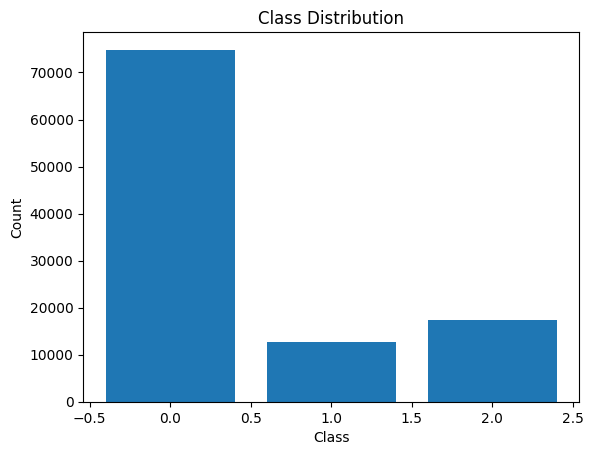

Training Set Class Distribution:
0    52387
2    12125
1     8943
Name: class, dtype: int64


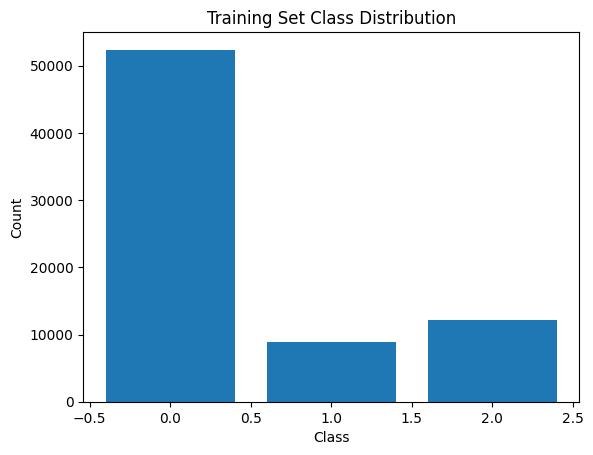

The training set is imbalanced.


In [20]:
# Tip : You can use this library : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Split ratio depends on the specific characteristics of your dataset and the problem you are trying to solve.
# A common choice is an 80-20 or 70-30 split for training and testing, respectively.


import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class_counts = df_imputed['class'].value_counts()
print("Original Class Distribution:")
print(class_counts)

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

X = df_imputed.drop('class', axis=1)
y = df_imputed['class']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

train_class_counts = y1_train.value_counts()
print("Training Set Class Distribution:")
print(train_class_counts)

plt.bar(train_class_counts.index, train_class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Training Set Class Distribution')
plt.show()

imbalance_threshold = 0.2

is_imbalanced = any(count / len(y_train) < imbalance_threshold for count in train_class_counts)
if is_imbalanced:
    print("The training set is imbalanced.")
else:
    print("The training set is not imbalanced.")

# Yes, the training set is imbalanced

# 5. Train with k-fold cross validation (n_splits=5) a Logistic regression C = 0.0001 and display its confusion matrix, its accuracy and F1 score

In [21]:
# Tip : Logistic : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#       Cross-validation : https://scikit-learn.org/stable/modules/cross_validation.html

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

logreg_model = LogisticRegression(C=0.0001, random_state=42)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_pred_cv = cross_val_predict(logreg_model, X1_train, y1_train, cv=kf)

conf_matrix = confusion_matrix(y1_train, y_pred_cv)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y1_train, y_pred_cv)
print(f'Accuracy: {accuracy:.4f}')

f1 = f1_score(y1_train, y_pred_cv,average='weighted') # Weighted F1 score is selected
print(f'F1 Score: {f1:.4f}')


Confusion Matrix:
[[52387     0     0]
 [ 8943     0     0]
 [ 6805     0  5320]]
Accuracy: 0.7856
F1 Score: 0.7207


# 6. Balance your training dataset using the method your want & perform same training as Question 5. What do you expect ? What do you get ? Discuss.

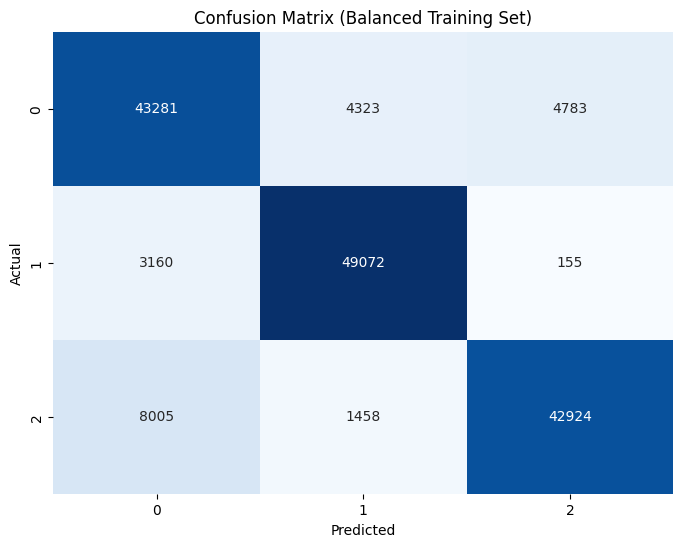

Accuracy on Balanced Training Set: 0.8608
F1 Score on Balanced Training Set: 0.8606


In [22]:
# Tip : In the practical about balancing we use SMOTE https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
#       Feel free to re use SMOTE, or another technique that you like (many SMOTE-variants exists)

# Your code here

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X1_train, y1_train)

logreg_model = LogisticRegression(C=0.0001, random_state=42)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_pred_cv_balanced = cross_val_predict(logreg_model, X_train_balanced, y_train_balanced, cv=kf)

conf_matrix_balanced = confusion_matrix(y_train_balanced, y_pred_cv_balanced)
class_labels_balanced = np.unique(y_train_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels_balanced, yticklabels=class_labels_balanced)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Balanced Training Set)')
plt.show()

accuracy_balanced = accuracy_score(y_train_balanced, y_pred_cv_balanced)
print(f'Accuracy on Balanced Training Set: {accuracy_balanced:.4f}')

f1_balanced = f1_score(y_train_balanced, y_pred_cv_balanced,average='weighted') # Weighted F1 score is selected
print(f'F1 Score on Balanced Training Set: {f1_balanced:.4f}')


# Expected that the model might have struggled to capture the minority class due to its imbalanced nature.
# F1 score might have been biased towards the majority class.

# After Balancing, the model trained on the balanced dataset should perform better on the minority class.
# The confusion matrix, accuracy, and F1 score should reflect a more balanced evaluation across both classes.

# Accuracy on Balanced Training Set: 0.8608
# F1 Score on Balanced Training Set: 0.8606
# Both are improved


# 7. Train with k-fold cross validation (n_splits=5) a Random Forest (n_estimator = 10) and display its confusion matrix, its accuracy and F1 score

In [23]:
# Tip : RF classifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#       Cross-validation : https://scikit-learn.org/stable/modules/cross_validation.html

import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv_rf = cross_val_predict(rf_model, X1_train, y1_train, cv=kf)

conf_matrix_rf = confusion_matrix(y1_train, y_pred_cv_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

accuracy_rf = accuracy_score(y1_train, y_pred_cv_rf)
print(f'Accuracy (Random Forest): {accuracy_rf:.4f}')

f1_rf = f1_score(y1_train, y_pred_cv_rf,average='weighted')
print(f'F1 Score (Random Forest): {f1_rf:.4f}')


Confusion Matrix:
[[52017   262   108]
 [  609  8263    71]
 [  420   197 11508]]
Accuracy (Random Forest): 0.9773
F1 Score (Random Forest): 0.9772


# 8. Balance your training dataset using the method your prefer & perform the same training as in Question 7.

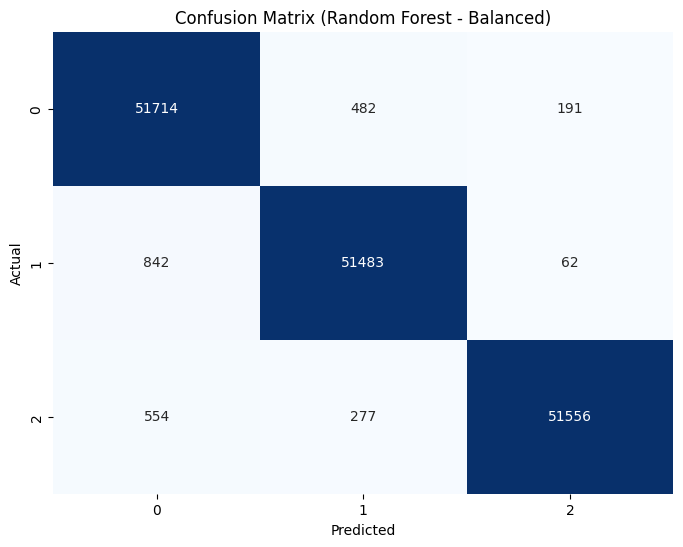

Accuracy (Random Forest - Balanced): 0.9847
F1 Score (Random Forest - Balanced): 0.9847


In [24]:
# Tip : In the practical about balancing we use SMOTE https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
#       Feel free to re use SMOTE, or another technique that you like (many SMOTE-variants exists)

import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)
X_train_balanced_rf, y_train_balanced_rf = smote.fit_resample(X1_train, y1_train)

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_pred_cv_rf_balanced = cross_val_predict(rf_model, X_train_balanced_rf, y_train_balanced_rf, cv=kf)

conf_matrix_rf_balanced = confusion_matrix(y_train_balanced_rf, y_pred_cv_rf_balanced)
class_labels_rf_balanced = np.unique(y_train_balanced_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_balanced, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels_rf_balanced, yticklabels=class_labels_rf_balanced)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest - Balanced)')
plt.show()


accuracy_rf_balanced = accuracy_score(y_train_balanced_rf, y_pred_cv_rf_balanced)
print(f'Accuracy (Random Forest - Balanced): {accuracy_rf_balanced:.4f}')

f1_rf_balanced = f1_score(y_train_balanced_rf, y_pred_cv_rf_balanced,average='weighted')
print(f'F1 Score (Random Forest - Balanced): {f1_rf_balanced:.4f}')


# 9. After balancing your data with the Logistic regression and the Random Forest what do you get ? What do you expect ? Discuss.

## Logistic Regression
- **After Balancing:** Logistic Regression, being a linear model, might show a marginal improvement in both accuracy and F1 score after applying balancing techniques like SMOTE. This is because it now has more data points from the minority class to learn from, which can help in better decision boundary formation.
- **Expectations:** The improvement in Logistic Regression may not be as pronounced as in more complex models. However, you should expect some enhancement in the model's ability to correctly classify instances of the minority class, reflected in the confusion matrix, accuracy, and F1 score.

## Random Forest
- **After Balancing:** With Random Forest, an ensemble model, the difference in performance after balancing might be very small. This is because Random Forest is inherently better at handling class imbalances due to its structure (it builds multiple decision trees and merges their outputs).
- **Expectations:** Even without balancing, Random Forest tends to perform relatively well on imbalanced datasets. However, post-balancing, there should be some improvement, especially in terms of the model's sensitivity to the minority class.

## General Observations
- **Balancing Techniques:** Techniques like SMOTE can significantly improve the performance of models on imbalanced datasets. They help the models to better understand and differentiate the minority class, which is often the class of interest in problems like fraud detection or rare disease diagnosis.
- **Evaluation Metrics:** While accuracy gives an overall performance measure, it might be misleading in imbalanced datasets. The F1 score, which considers both precision and recall, is a more reliable metric in these scenarios. An improvement in the F1 score after balancing indicates that the model is not only predicting the majority class well but also performing better on the minority class.
- **Model-Specific Considerations:** The extent of improvement varies between models. Simpler models like Logistic Regression might show more noticeable improvement than more complex models like Random Forest, which already have mechanisms to deal with imbalances to some extent.

# 10. Open question : Propose a scenario to compensate class imbalance in the dataset and get better accuracy and f1 score.
# Is balancing always a good strategy ?

You can propose one or several approaches.

---


Tip : You can focus on the proportion of added data in your dataset, the model used, or more 😀

# Scenario: Financial Fraud Detection

Consider a financial transaction dataset where the goal is to detect fraudulent transactions. This dataset is typically imbalanced, with a large number of legitimate transactions (negative class) and a relatively small number of fraudulent transactions (positive class). The challenge is to accurately identify fraudulent transactions while minimizing the misclassification of legitimate transactions as fraud.

## Class Imbalance
The imbalance in the dataset can lead to a model that is overly biased towards predicting transactions as legitimate, potentially missing fraudulent activities.

## Approach 1: Utilize SMOTE for Oversampling
Use Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic examples of the minority class (fraudulent transactions). This can help balance the class distribution, providing the model with more examples of fraud to learn from. However, it's crucial to ensure that the synthetic samples are realistic and do not introduce noise into the model.

## Approach 2: Ensemble Methods
Implement ensemble methods, like Random Forest or Gradient Boosting, which can handle imbalance inherently. These models can be adjusted to focus more on the minority class, either through boosting techniques that adaptively change the weight of misclassified instances or through bagging methods that create multiple subsets of data.

## Approach 3: Anomaly Detection
In cases of extreme imbalance, treating fraud detection as an anomaly detection problem can be effective. This approach focuses on identifying patterns that do not conform to expected behavior, which is suitable for detecting rare events like fraud.

## Balancing Considerations
While balancing the dataset can improve model performance in detecting fraud, it's not a one-size-fits-all solution. It's important to carefully consider the context and nature of the data. For example, oversampling can lead to overfitting, especially if fraudulent transactions are not diverse enough. Similarly, undersampling the majority class might result in the loss of important information. The choice of strategy should be guided by the specific characteristics of the dataset and the objectives of the analysis.